In [1]:
from pathlib import Path
BASE_DIR = Path().resolve()
import sys
sys.path.append(str(BASE_DIR.parent / 'scr'))

from dataset_generator import variables, generar_dataset

In [2]:
Nx = 50
Ny = 50
dx = 0.05
dy = 0.05

generar_dataset(100000, Nx, Ny, dx, dy,'dataset_100000_test')

Se tienen 0/100000 muestras generadas.
Se tienen 50/100000 muestras generadas.
Se tienen 100/100000 muestras generadas.
Se tienen 150/100000 muestras generadas.
Se tienen 200/100000 muestras generadas.
Se tienen 250/100000 muestras generadas.
Se tienen 300/100000 muestras generadas.
Se tienen 350/100000 muestras generadas.
Se tienen 400/100000 muestras generadas.
Se tienen 450/100000 muestras generadas.
Se tienen 500/100000 muestras generadas.
Se tienen 550/100000 muestras generadas.
Se tienen 600/100000 muestras generadas.
Se tienen 650/100000 muestras generadas.
Se tienen 700/100000 muestras generadas.
Se tienen 750/100000 muestras generadas.
Se tienen 800/100000 muestras generadas.
Se tienen 850/100000 muestras generadas.
Se tienen 900/100000 muestras generadas.
Se tienen 950/100000 muestras generadas.
Se tienen 1000/100000 muestras generadas.
Se tienen 1050/100000 muestras generadas.
Se tienen 1100/100000 muestras generadas.
Se tienen 1150/100000 muestras generadas.
Se tienen 1200/

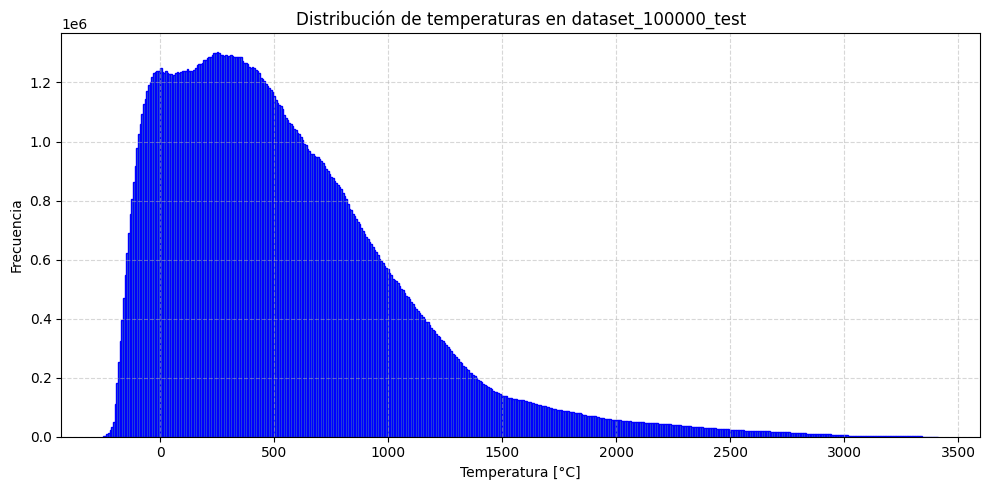

Estadísticas generales de dataset_100000_test:
Temperatura mínima: -249.98 °C
Temperatura máxima: 3411.75 °C
Temperatura media: 542.51 °C
Temperatura std: 514.39

Mostrando muestras más cercanas a los valores promedio del dataset:

Muestra más cercana por temperatura mínima promedio en índice: 10492
Temperatura mínima: 148.90 °C
Temperatura máxima: 923.10 °C
Temperatura media: 551.19 °C
Temperatura std: 154.47

Condiciones de borde y material de la muestra:


material    Steel - Chrome Nickel, 20% Cr, 15% Ni
k                                            15.1
T_fusion                                   1400.0
T_hp                                      148.899
i_hp                                           49
j_hp                                           45
tipo_A                                        flu
tipo_B                                        flu
tipo_C                                       temp
tipo_D                                       temp
valor_A                                  8149.135
valor_B                                   5681.73
valor_C                                   364.017
valor_D                                   923.098
Name: 10492, dtype: object

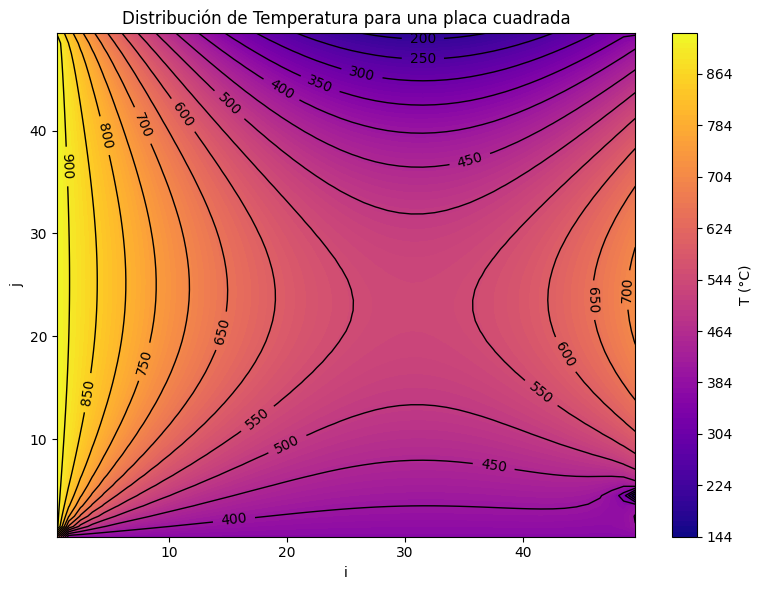


Muestra más cercana por temperatura máxima promedio en índice: 37659
Temperatura mínima: -177.90 °C
Temperatura máxima: 937.22 °C
Temperatura media: 390.17 °C
Temperatura std: 318.45

Condiciones de borde y material de la muestra:


material     Inconel
k               15.0
T_fusion      1390.0
T_hp         584.661
i_hp               9
j_hp              38
tipo_A           flu
tipo_B           flu
tipo_C          temp
tipo_D           flu
valor_A     7035.326
valor_B       30.933
valor_C      937.215
valor_D    -1095.251
Name: 37659, dtype: object

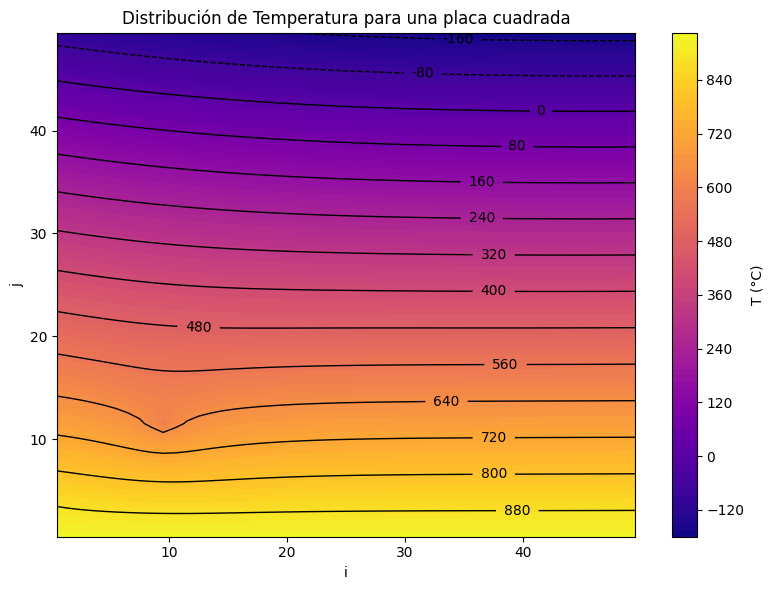


Muestra más cercana por temperatura media promedio en índice: 56349
Temperatura mínima: 6.85 °C
Temperatura máxima: 1052.76 °C
Temperatura media: 542.50 °C
Temperatura std: 208.50

Condiciones de borde y material de la muestra:


material      Nickel
k               94.0
T_fusion      1455.0
T_hp        1052.755
i_hp              32
j_hp              31
tipo_A          temp
tipo_B          temp
tipo_C          temp
tipo_D           flu
valor_A      464.868
valor_B        6.846
valor_C       840.95
valor_D    -2799.851
Name: 56349, dtype: object

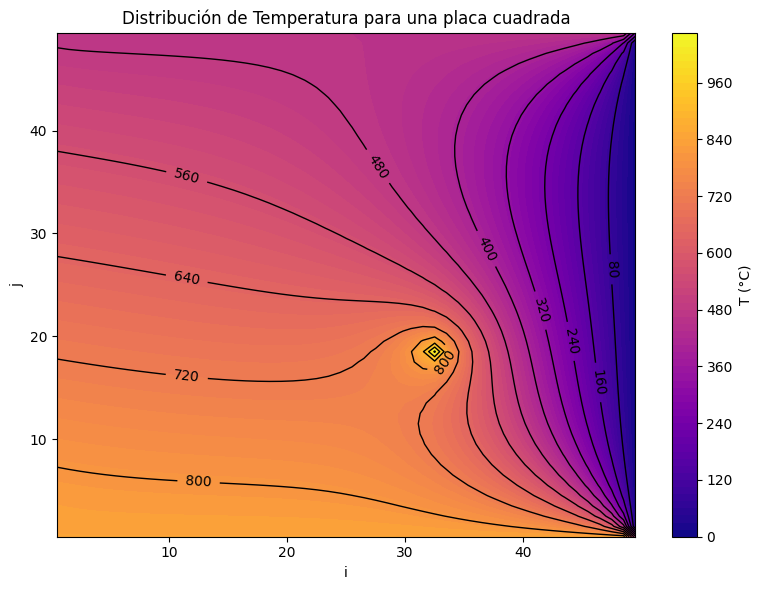


Muestra más cercana por temperatura std promedio en índice: 21818
Temperatura mínima: 79.47 °C
Temperatura máxima: 798.02 °C
Temperatura media: 384.13 °C
Temperatura std: 162.87

Condiciones de borde y material de la muestra:


material    Copper - Brass (Yellow Brass)
k                                   111.0
T_fusion                            920.0
T_hp                               79.468
i_hp                                   38
j_hp                                   32
tipo_A                                flu
tipo_B                                flu
tipo_C                               temp
tipo_D                               temp
valor_A                           -5408.4
valor_B                          1429.171
valor_C                           798.017
valor_D                           115.554
Name: 21818, dtype: object

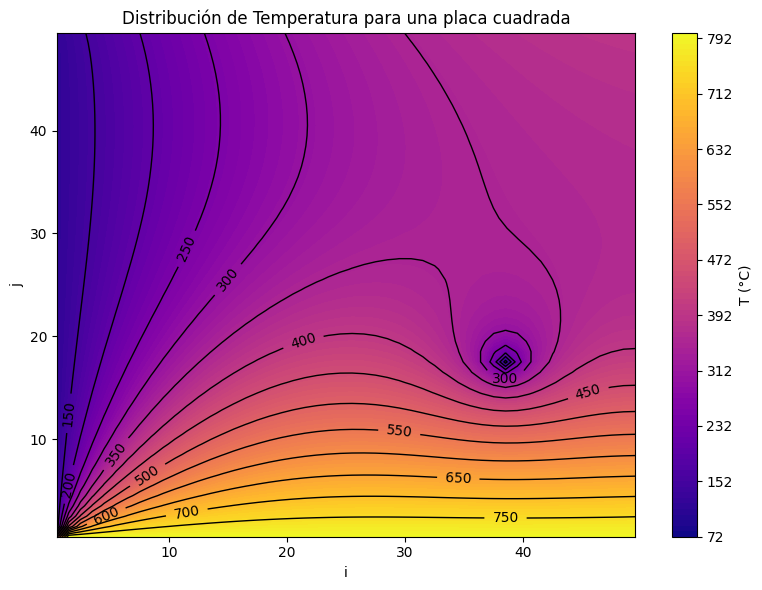

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
from utils import graficarChapa
import matplotlib.pyplot as plt

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

# Rutas de los archivos
folder_name = 'dataset_100000_test'  # cambiar según el dataset a inspeccionar
Y_path = BASE_DIR.parent / 'data' / folder_name / 'Y.npy'
csv_path = BASE_DIR.parent / 'data' / folder_name / 'dataset_variables.csv'

# ---------------- CARGA DE DATOS ----------------
Y_data = np.load(Y_path).astype(np.float32)  # shape (n_samples, 2500)
df_registros = pd.read_csv(csv_path, sep=';')

# ---------------- HISTOGRAMA GENERAL ----------------
Y_flat = Y_data.flatten()

plt.figure(figsize=(10,5))
plt.hist(Y_flat, bins=500, color='steelblue', edgecolor='blue')
plt.title(f"Distribución de temperaturas en {folder_name}")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Estadísticas generales de {folder_name}:")
print(f"Temperatura mínima: {Y_flat.min():.2f} °C")
print(f"Temperatura máxima: {Y_flat.max():.2f} °C")
print(f"Temperatura media: {Y_flat.mean():.2f} °C")
print(f"Temperatura std: {Y_flat.std():.2f}")

# ---------------- CÁLCULO DE ESTADÍSTICOS POR MUESTRA ----------------
mins = Y_data.min(axis=1)
maxs = Y_data.max(axis=1)
means = Y_data.mean(axis=1)
stds = Y_data.std(axis=1)

# ---------------- SELECCIÓN AUTOMÁTICA DE OBJETIVOS ----------------
target_min = mins.mean()
target_max = maxs.mean()
target_mean = means.mean()
target_std = stds.mean()

print("\nMostrando muestras más cercanas a los valores promedio del dataset:")

# Encontrar índices más cercanos
idx_min_closest = np.argmin(np.abs(mins - target_min))
idx_max_closest = np.argmin(np.abs(maxs - target_max))
idx_mean_closest = np.argmin(np.abs(means - target_mean))
idx_std_closest = np.argmin(np.abs(stds - target_std))

# Función auxiliar para mostrar información
def mostrar_info(idx, descripcion):
    print(f"\n{descripcion} en índice: {idx}")
    print(f"Temperatura mínima: {mins[idx]:.2f} °C")
    print(f"Temperatura máxima: {maxs[idx]:.2f} °C")
    print(f"Temperatura media: {means[idx]:.2f} °C")
    print(f"Temperatura std: {stds[idx]:.2f}")

    print("\nCondiciones de borde y material de la muestra:")
    display(df_registros.iloc[idx])

    Y_sample = Y_data[idx].reshape(50, 50)
    graficarChapa(Y_sample, 50, 50)

# Mostrar cada muestra más cercana
mostrar_info(idx_min_closest, "Muestra más cercana por temperatura mínima promedio")
mostrar_info(idx_max_closest, "Muestra más cercana por temperatura máxima promedio")
mostrar_info(idx_mean_closest, "Muestra más cercana por temperatura media promedio")
mostrar_info(idx_std_closest, "Muestra más cercana por temperatura std promedio")
